In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["font.family"]="Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"]= False

import warnings
warnings.simplefilter('ignore')

## 피마인디안 데이터 불러오기

In [3]:
df = pd.read_csv('data/pima-indians-diabetes.data.csv')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [5]:
x_data = df.iloc[:,:-1]
y_data = df.iloc[:,-1]

print(x_data.shape, y_data.shape)

(768, 8) (768,)


In [6]:
# 학습, 테스트 데이터셋
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
        test_size=0.2, stratify=y_data)

In [20]:
# validation_fraction = 0.1 10%를 검증셋으로 사용
# early_stopping = True 과적합이 일어난곳에서 빠져나감

m_pipe = make_pipeline(StandardScaler(), MLPClassifier(early_stopping = True))

m_pipe.fit(x_train, y_train) 

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlpclassifier',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=True, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False)

In [21]:
# 파이프라인에 들어있는 mlp loss_curve 가져오기
m_pipe.named_steps['mlpclassifier'].loss_curve_

[0.7755013941889559,
 0.746142491177037,
 0.7182401524296881,
 0.6932668168269567,
 0.6719383819796573,
 0.6514136618341293,
 0.633355246137581,
 0.6171040838253391,
 0.6021141871607854,
 0.5897057722559779,
 0.5778251498490915,
 0.5665153910036276,
 0.5573505267811089,
 0.5479206020405867,
 0.5397420380426939,
 0.5319236359127061,
 0.5252632074788584,
 0.5190768160663084,
 0.5125787907717472,
 0.507545723642623,
 0.5022091364322059,
 0.49804454219499844,
 0.493252575552123,
 0.4892082405024738,
 0.4855206779365562,
 0.4821093183978835,
 0.478874804841227,
 0.47581475408953117,
 0.4730129327271361,
 0.47059316255313416,
 0.4680130822910131]

In [24]:
m_pipe.named_steps['mlpclassifier'].validation_scores_

[0.3548387096774194,
 0.4032258064516129,
 0.45161290322580644,
 0.5161290322580645,
 0.6290322580645161,
 0.6935483870967742,
 0.6935483870967742,
 0.7096774193548387,
 0.6935483870967742,
 0.7258064516129032,
 0.7258064516129032,
 0.7419354838709677,
 0.7741935483870968,
 0.7741935483870968,
 0.7741935483870968,
 0.7903225806451613,
 0.7903225806451613,
 0.7903225806451613,
 0.7903225806451613,
 0.8064516129032258,
 0.8064516129032258,
 0.8064516129032258,
 0.8064516129032258,
 0.7903225806451613,
 0.7903225806451613,
 0.7903225806451613,
 0.8064516129032258,
 0.8064516129032258,
 0.8064516129032258,
 0.8064516129032258,
 0.8064516129032258]

### pipeline 적용안한것

In [12]:
m_mlp = MLPClassifier(early_stopping = True)
m_mlp.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [11]:
# loss값이 줄어드는것을 확인
# 학습간 cost값, 
m_mlp.loss_curve_

[10.259542351940985,
 8.005546206641695,
 5.998173944620276,
 4.2533126009553515,
 2.6038617397737283,
 1.9736502633898867,
 2.0001882518300587,
 1.957178562735012,
 1.8293417574768946,
 1.4348567672223513,
 1.1925376140942976,
 1.2135873858296067,
 1.210400874035552,
 1.0899031171247513,
 1.008851043876057,
 0.9767744806266703,
 0.957680723147232,
 0.8926869367444722,
 0.8616964058806461,
 0.8414409105812083,
 0.8033285100384058,
 0.7648370466986443,
 0.7585964843514708,
 0.7184678614642068,
 0.6919074539623415,
 0.6935038189310492,
 0.6716299178244903,
 0.6511948646522503,
 0.641770016498763,
 0.6334708770335915]

In [17]:
# 검증셋의 점수값
m_mlp.validation_scores_

[0.7419354838709677,
 0.7096774193548387,
 0.6612903225806451,
 0.5806451612903226,
 0.6129032258064516,
 0.6290322580645161,
 0.6290322580645161,
 0.6774193548387096,
 0.7096774193548387,
 0.6129032258064516,
 0.6129032258064516,
 0.7903225806451613,
 0.6451612903225806,
 0.5967741935483871,
 0.6612903225806451,
 0.6774193548387096,
 0.6290322580645161,
 0.6290322580645161,
 0.6129032258064516,
 0.6612903225806451,
 0.6612903225806451,
 0.6290322580645161,
 0.6935483870967742]

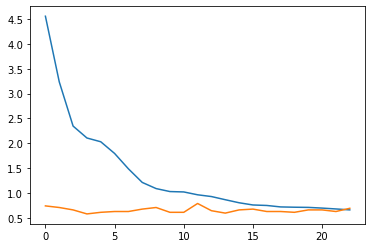

In [18]:
plt.plot(m_mlp.loss_curve_)
plt.plot(m_mlp.validation_scores_)
plt.show()